In [1]:
from IPython.display import display
import spot
from spot.jupyter import display_inline
spot.setup()

To build an automaton from an LTL formula, simply call `translate()` with a formula, and a list of options to characterize the automaton you want (those options have the same name as the long options name of the `ltl2tgba` tool, and they can be abbreviated).

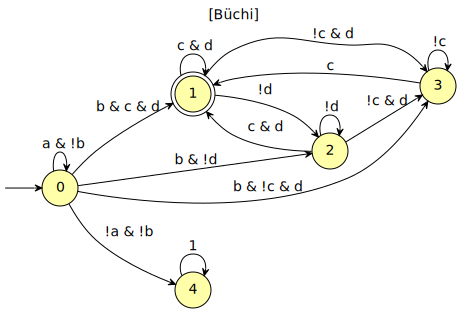

In [2]:
a = spot.translate('(a U b) & GFc & GFd', 'Buchi', 'state-based', 'complete'); a

The call the `spot.setup()` in the first cells has installed a default style for the graphviz output.  If you want to change this style temporarily, you can call the `show(style)` method explicitly.  For instance here is a vertical layout with the default font of GraphViz.

In [3]:
a.show("v")

If you want to add some style options to the existing one, pass a dot to the `show()` function in addition to your own style options:

In [4]:
a.show(".st")

The `translate()` function can also be called with a formula object.  Either as a function, or as a method.

In [5]:
f = spot.formula('a U b'); f

spot.formula("a U b")

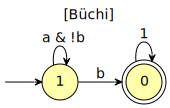

In [6]:
spot.translate(f)

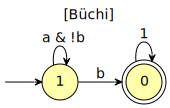

In [7]:
f.translate()

When used as a method, all the arguments are translation options.  Here is a monitor:

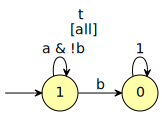

In [8]:
f.translate('mon')

The following three cells show a formulas for which it makes a difference to select `'small'` or `'deterministic'`.

In [9]:
f = spot.formula('Ga | Gb | Gc'); f

spot.formula("Ga | Gb | Gc")

In [10]:
f.translate('buchi', 'state-based', 'small').show('.v')

In [11]:
f.translate('buchi', 'state-based', 'det').show('v.')

Here is how to build an unambiguous automaton:

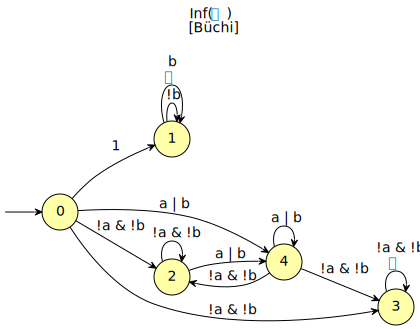

In [12]:
spot.translate('GFa -> GFb', 'unambig')

Compare with the standard translation:

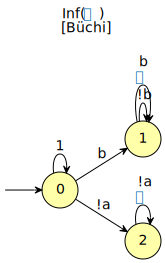

In [13]:
spot.translate('GFa -> GFb')

And here is the automaton above with state-based acceptance:

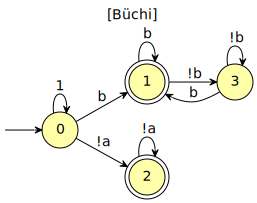

In [14]:
a = spot.translate('GFa -> GFb', 'sbacc')
a

Some example of running the self-loopization algorithm on an automaton:

In [15]:
a.is_empty()

False

Reading from file (see `automaton-io.ipynb` for more examples).

In [16]:
%%file example1.aut
HOA: v1
States: 3
Start: 0
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 5 Inf(0)&Fin(1)&Fin(4) | Inf(2)&Inf(3) | Inf(1)
--BODY--
State: 0 {3}
[t] 0
[0] 1 {1}
[!0] 2 {0 4}
State: 1 {3}
[1] 0
[0&1] 1 {0}
[!0&1] 2 {2 4}
State: 2 
[!1] 0
[0&!1] 1 {0}
[!0&!1] 2 {0 4}
--END--

Writing example1.aut


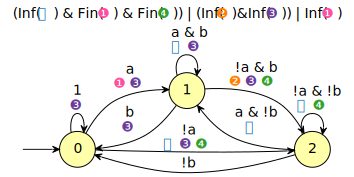

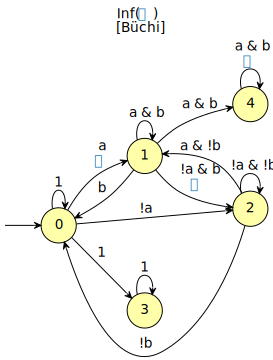

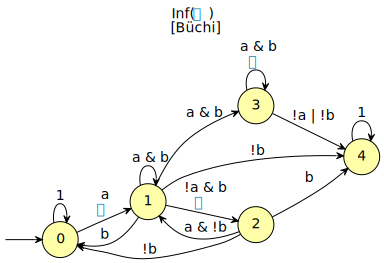

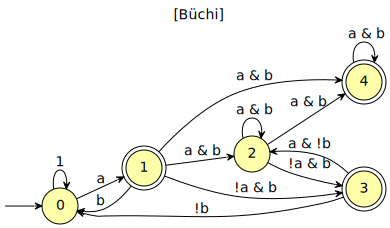

In [17]:
a = spot.automaton('example1.aut')
display(a)
display(spot.remove_fin(a))
display(a.postprocess('GeneralizedBuchi', 'complete'))
display(a.postprocess('Buchi', "SBAcc"))

In [18]:
!rm example1.aut

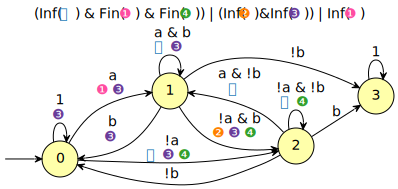

In [19]:
spot.complete(a)

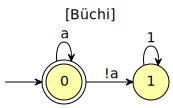

In [20]:
spot.complete(spot.translate('Ga'))

In [21]:
spot.formula('(a W c) & FGa').is_syntactic_persistence()

True

In [22]:
# Using +1 in the display options is a convenient way to shift the 
# set numbers in the output, as an aid in reading the product.
a1 = spot.translate('GF(a <-> Xa)')
a2 = spot.translate('a U b & GFc')
display_inline(a1.show('.t'), a2.show('.t+1'))
# the product should display pairs of states, unless asked not to (using '1').
p = spot.product(a1, a2)
display_inline(p.show('.t'), p.show('.t1'), per_row=2)

Explicit determinization after translation:

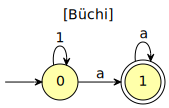

False

In [23]:
a = spot.translate('FGa')
display(a)
display(a.is_deterministic())

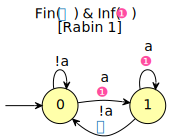

In [24]:
spot.tgba_determinize(a)

Determinization by `translate()`.  The `generic` option allows any acceptance condition to be used instead of the default generalized Büchi.

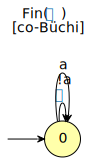

In [25]:
spot.translate('FGa', 'generic', 'deterministic')

Translation to state-based co-Büchi automaton

In [26]:
spot.translate('FGa', 'coBuchi', 'deterministic', 'sbacc').show('.b')

Translation to parity automaton.  Specifying just `parity max odd` requires a parity acceptance.  Adding `colored` ensures that each transition (or state if `sbacc` is also given) has a color, as people usually expect in parity automata.

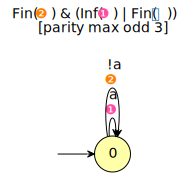

In [27]:
spot.translate('FGa', 'parity max odd', 'colored')

Adding an atomic proposition to all edges

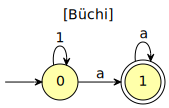

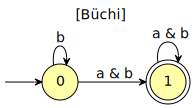

In [28]:
import buddy
display(a)
b = buddy.bdd_ithvar(a.register_ap('b'))
for e in a.edges():
    e.cond &= b
display(a)

Adding an atomic proposition to the edge between 0 and 1:

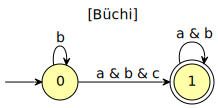

In [29]:
c = buddy.bdd_ithvar(a.register_ap('c'))
for e in a.out(0):
    if e.dst == 1:
        e.cond &= c
a